In [4]:
%load_ext autoreload
%autoreload 2

# import libraries
import numpy as np
import matplotlib.pyplot as plt
import pyshtools as pysh
import SLmod as SL
import RFmod as RF
from numpy import pi as pi

#set plotting parameters
plt.rc('xtick', labelsize=18) 
plt.rc('ytick', labelsize=18) 
font = {'size'   : 20}
plt.rc('font', **font)
plt.rcParams['figure.figsize'] = [16, 8]

# get values for some physical parameters
b = SL.b
g = SL.g
rhoi = SL.rhoi
rhow = SL.rhow

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


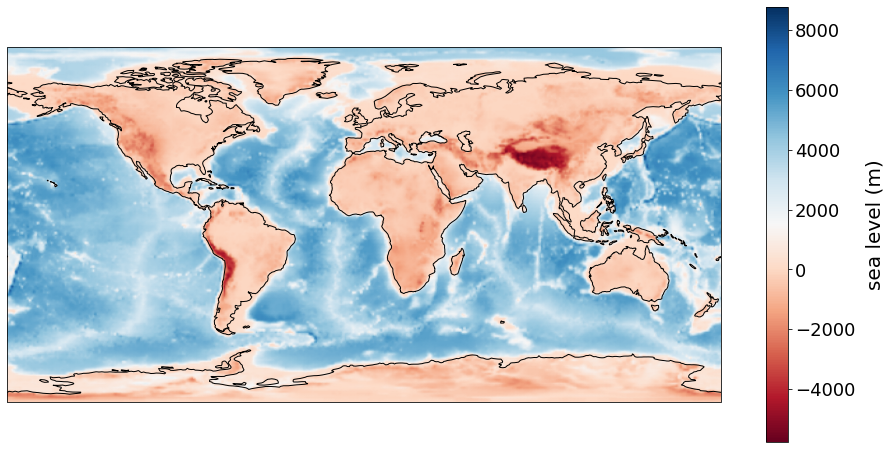

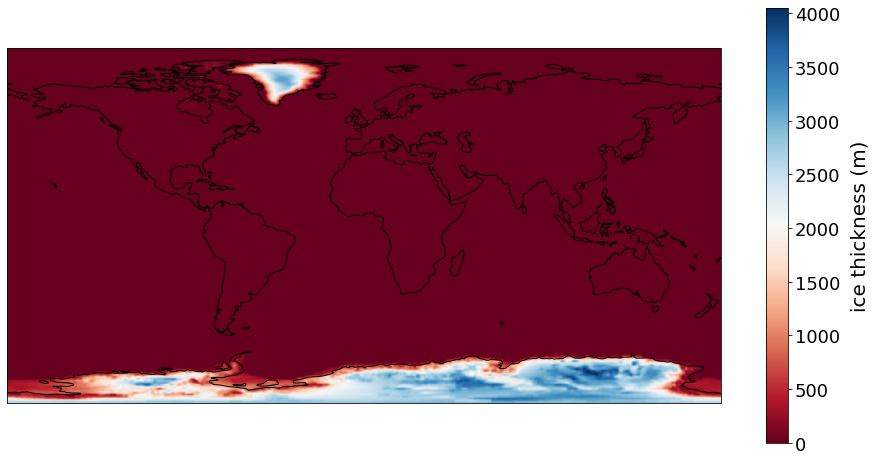

fraction of surface which is ocean =  0.7118907012236343


In [5]:
# set the truncation degree
L=256

# read in the present day sea level and ice thickness
sl0,ice0 = SL.get_sl_ice_data(L)

# plot these fields
SL.plot(sl0,label = 'sea level (m)')
SL.plot(ice0,label = 'ice thickness (m)')

# compute the ocean function
C = SL.ocean_function(sl0,ice0)

# work out the ocean area and check the value
A = SL.surface_integral(C)
A_earth = 4*pi*b**2
print('fraction of surface which is ocean = ',A/A_earth)

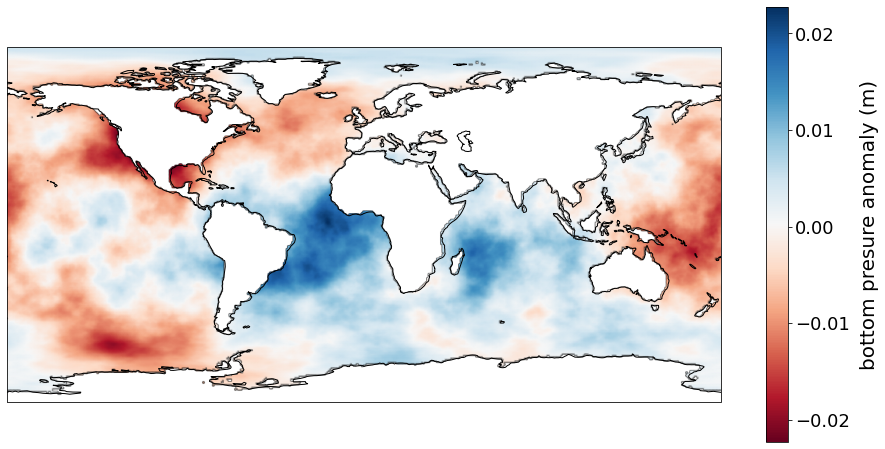

iteration =  1 relative change =  0.17838053321947894
iteration =  2 relative change =  0.03505524355617341
iteration =  3 relative change =  0.007603805376427087
iteration =  4 relative change =  0.0017513880533396847
iteration =  5 relative change =  0.00041700279741915694
iteration =  6 relative change =  0.00010221138231006501
iteration =  7 relative change =  2.5840510157521354e-05
iteration =  8 relative change =  6.952568427583644e-06
iteration =  9 relative change =  1.944043979594123e-06
iteration =  10 relative change =  5.598809638802458e-07
iteration =  11 relative change =  1.6552752730193427e-07
iteration =  12 relative change =  5.0026666642844526e-08
iteration =  13 relative change =  1.5396546389621643e-08
iteration =  14 relative change =  4.805597185062115e-09


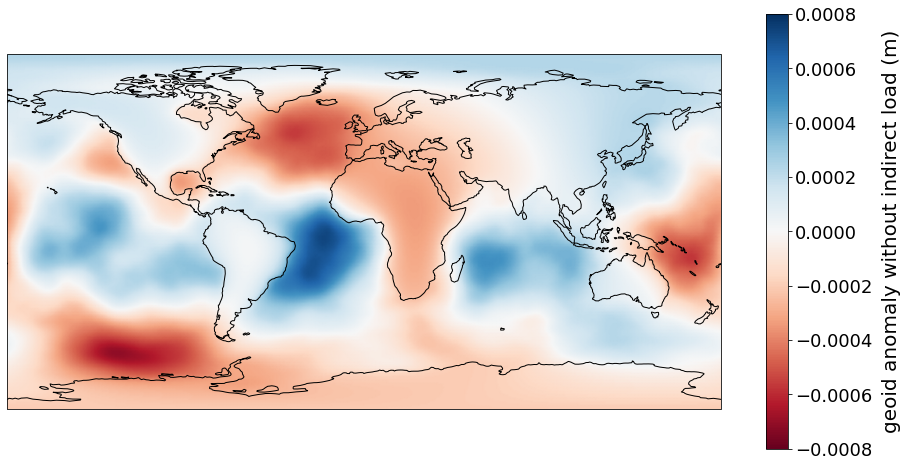

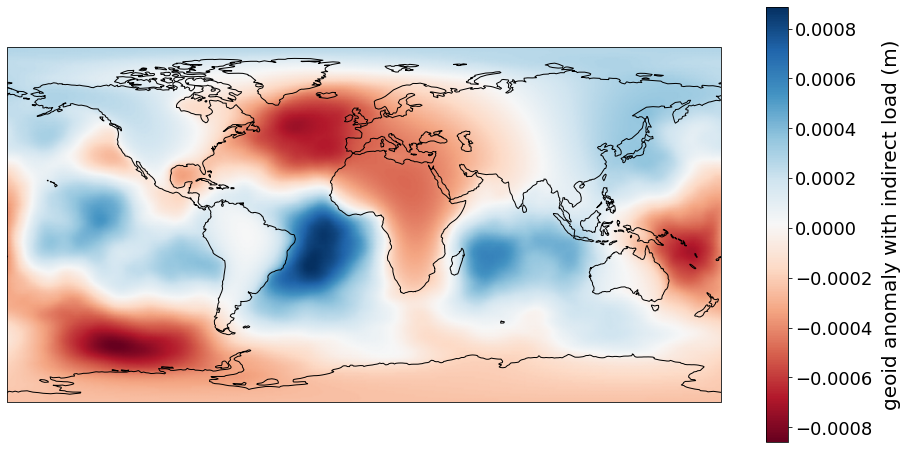

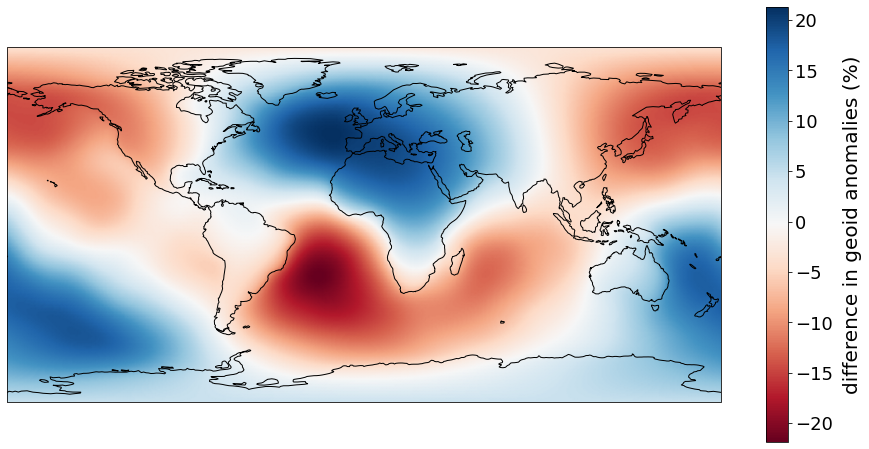

GRACE average of load =  0.002688675274473643
true average of load  =  0.0039473718831938955
relative difference   =  -31.886952786972184 %
iteration =  1 relative change =  0.02646581806584205
iteration =  2 relative change =  0.0010263044967013418
iteration =  3 relative change =  6.983834494899457e-05
iteration =  4 relative change =  8.455907848167654e-06
iteration =  5 relative change =  1.5298195577890638e-06
iteration =  6 relative change =  3.4991562049182406e-07
iteration =  7 relative change =  8.773443876541203e-08
iteration =  8 relative change =  2.3293860643121245e-08
iteration =  9 relative change =  6.4697314102298044e-09


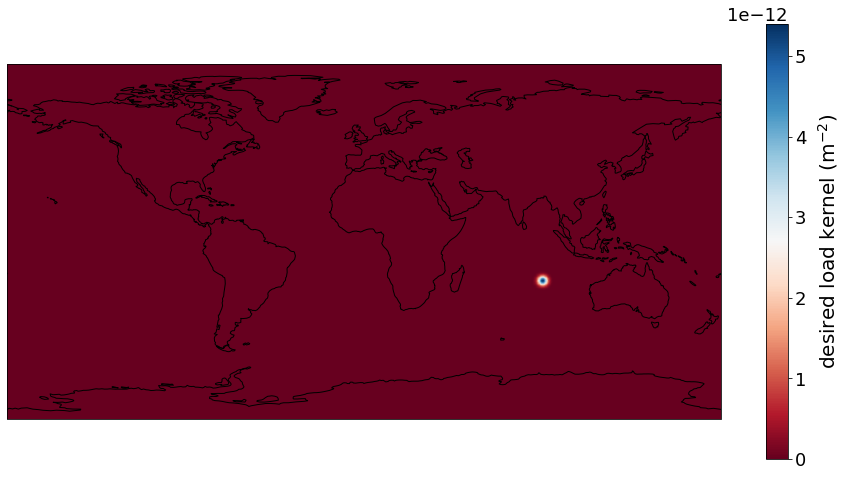

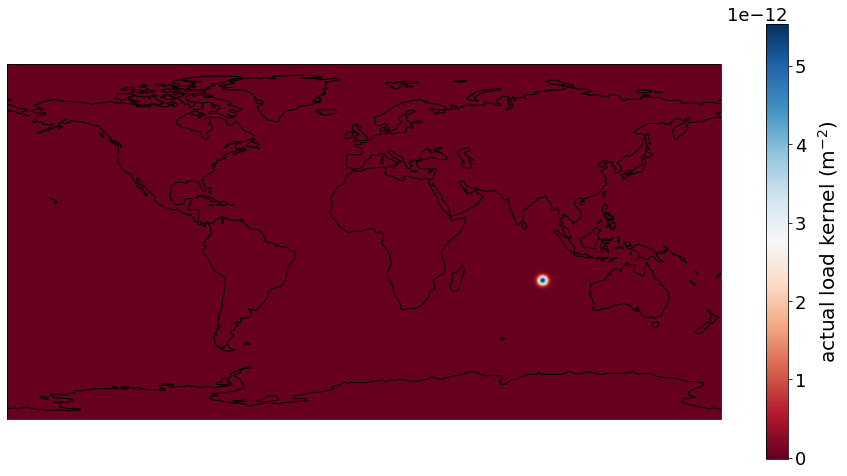

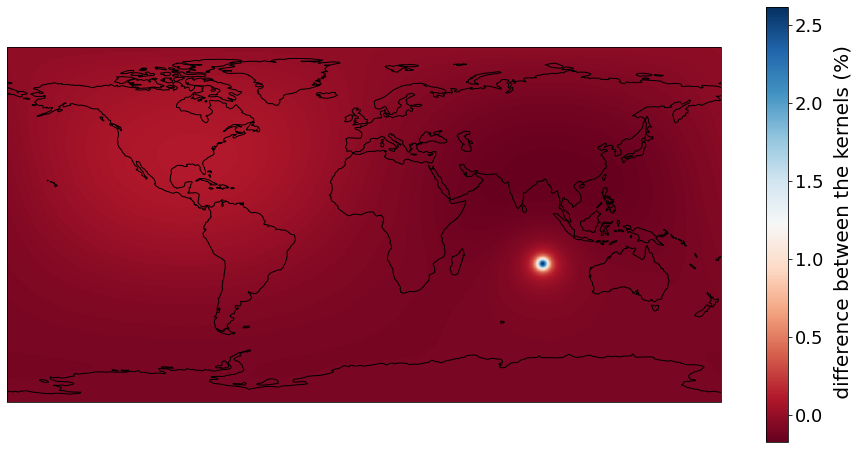

GRACE average of load =  0.005451703221616443
true average of load  =  0.007264586253959565
relative difference   =  -24.955076159430416 %
iteration =  1 relative change =  0.08970746063829352
iteration =  2 relative change =  0.009986511333870504
iteration =  3 relative change =  0.001408623953582684
iteration =  4 relative change =  0.00024636798659969446
iteration =  5 relative change =  5.1187676515344995e-05
iteration =  6 relative change =  1.1969564475044476e-05
iteration =  7 relative change =  3.0148742508152617e-06
iteration =  8 relative change =  8.014838225329722e-07
iteration =  9 relative change =  2.3045165943396572e-07
iteration =  10 relative change =  6.81269852930763e-08
iteration =  11 relative change =  2.0567706539720293e-08
iteration =  12 relative change =  6.317010497359522e-09


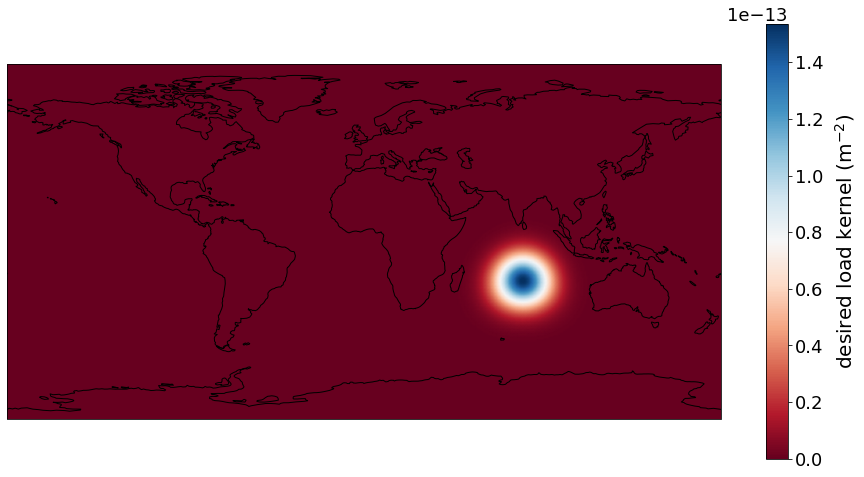

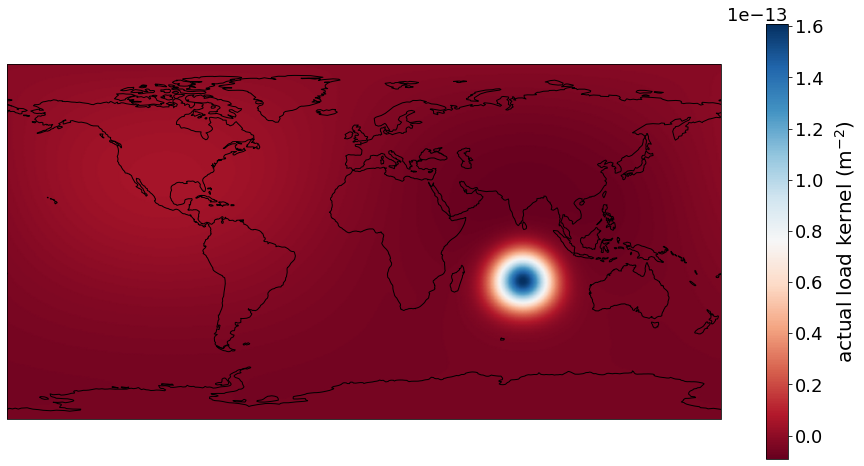

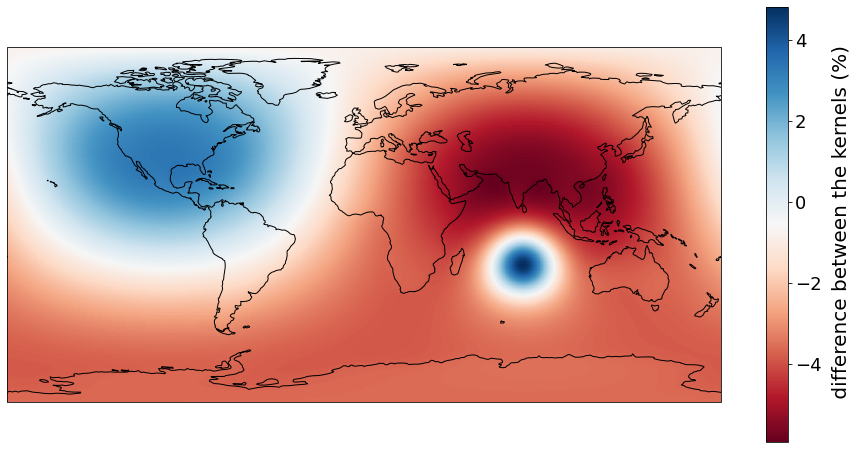

In [9]:
# make a random ocean load
ocean_mask = SL.ocean_mask(sl0,ice0)
Q = RF.sobolev_covariance(L,std = 0.01,s = 2,mu = 0.5,b = SL.b)
#zeta_dyn = SL.random_ocean_load(C,Q,b=SL.b)
sl_dyn = zeta_dyn/SL.rhow
SL.plot(ocean_mask*sl_dyn,label="bottom presure anomaly (m)")

# compute the simplified response
_,phi_dir = SL.loading_response(zeta_dyn)


# compute the response
g = SL.g
sl_hyd,u_hyd,phi_hyd,om_hyd,psi_hyd = SL.fingerprint(C,zeta_dyn)
SL.plot(-(1/g)*phi_dir,label = r'geoid anomaly without indirect load (m)',clim = [-0.0008,0.0008])
SL.plot(-(1/g)*phi_hyd,label = r'geoid anomaly with indirect load (m)')
norm = np.max(np.abs(phi_hyd.data))
SL.plot(100*(phi_hyd-phi_dir)/norm,label = 'difference in geoid anomalies (%)')


# set the averaging function
w = SL.gaussian_averaging_function(L,r = 200,lat0 = -20.,lon0 = 90.)

# compute the true and GRACE average
true_average = SL.surface_integral(w*zeta_dyn)/SL.rhow
GRACE_average = SL.GRACE_average_measurement(phi_hyd,w,LT = 0)/SL.rhow

print('GRACE average of load = ',GRACE_average)
print('true average of load  = ',true_average)
print('relative difference   = ',100*(GRACE_average-true_average)/true_average,'%')

# form the adjoint loads
zeta_d, zeta_u_d, zeta_phi_d, kk_d  = SL.GRACE_average_load(w,LT = 0)

# solve the adjoint problem
sl_d,_,_,_,_ = SL.generalised_fingerprint(C,zeta_d,zeta_u_d,zeta_phi_d,kk_d)


# plot the kernel wrt zeta
SL.plot(w,label = r'desired load kernel (m$^{-2}$)')
SL.plot(sl_d,label = r'actual load kernel (m$^{-2}$)')

# plot the kernel wrt zeta
norm = np.max(np.abs(w.data[:,:]))
SL.plot(100*(sl_d-w)/norm,label = ' difference between the kernels (%)')


##########################################################
# now again with a wider average

# set the averaging function
w = SL.gaussian_averaging_function(L,r = 1200,lat0 = -20.,lon0 = 80.)

# compute the true and GRACE average
true_average = SL.surface_integral(w*zeta_dyn)/SL.rhow
GRACE_average = SL.GRACE_average_measurement(phi_hyd,w,LT = 0)/SL.rhow

print('GRACE average of load = ',GRACE_average)
print('true average of load  = ',true_average)
print('relative difference   = ',100*(GRACE_average-true_average)/true_average,'%')

# form the adjoint loads
zeta_d, zeta_u_d, zeta_phi_d, kk_d  = SL.GRACE_average_load(w,LT = 0)

# solve the adjoint problem
sl_d,_,_,_,_ = SL.generalised_fingerprint(C,zeta_d,zeta_u_d,zeta_phi_d,kk_d)


# plot the kernel wrt zeta
SL.plot(w,label = r'desired load kernel (m$^{-2}$)')
SL.plot(sl_d,label = r'actual load kernel (m$^{-2}$)')

# plot the kernel wrt zeta
norm = np.max(np.abs(w.data[:,:]))
SL.plot(100*(sl_d-w)/norm,label = ' difference between the kernels (%)')

